In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bureau = pd.read_csv('bureau.csv')
application_train = pd.read_csv('application_train.csv')

In [3]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Dados Duplicados

In [5]:
bureau.duplicated().sum()

0

In [6]:
bureau.SK_ID_CURR.duplicated().sum()

1410617

In [7]:
bureau.SK_ID_BUREAU.duplicated().sum()

0

In [8]:
bureau.SK_ID_CURR.value_counts()

SK_ID_CURR
120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
405288      1
413028      1
288569      1
215224      1
235871      1
Name: count, Length: 305811, dtype: int64

In [9]:
# As variaveis que possuem variações em suas descrições mostram informações adicionais para cda cliente
bureau[bureau['SK_ID_CURR'] == 120860].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,116.0,1.160000e+02,116.000000,116.0,107.000000,108.000000,43.000000,116.0,1.160000e+02,109.000000,56.000000,116.0,116.000000,81.000000
mean,120860.0,6.742437e+06,-464.913793,0.0,-13.242991,-366.481481,105.764651,0.0,7.954967e+04,803.707018,8694.864643,0.0,-305.146552,6079.055556
std,0.0,3.103266e+05,524.376326,0.0,3062.028495,434.677375,575.653537,0.0,1.420469e+05,4512.214580,65066.409036,0.0,392.482451,19576.411871
min,120860.0,5.090276e+06,-2771.000000,0.0,-2467.000000,-2467.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.0,-2467.000000,0.000000
25%,120860.0,6.800798e+06,-422.500000,0.0,-325.500000,-356.000000,0.000000,0.0,2.250000e+04,0.000000,0.000000,0.0,-314.250000,0.000000
50%,120860.0,6.800826e+06,-280.000000,0.0,-241.000000,-254.500000,0.000000,0.0,4.500000e+04,0.000000,0.000000,0.0,-223.500000,0.000000
75%,120860.0,6.800855e+06,-188.500000,0.0,-154.500000,-158.750000,0.000000,0.0,6.750000e+04,0.000000,0.000000,0.0,-76.000000,0.000000
max,120860.0,6.800884e+06,-14.000000,0.0,30950.000000,-11.000000,3698.235000,0.0,1.121742e+06,34516.485000,486912.420000,0.0,0.000000,70650.000000


In [10]:
# As variaveis que possuem variações em suas descrições mostram informações adicionais para cda cliente
bureau[bureau['SK_ID_CURR'] == 169704].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,94.0,9.400000e+01,94.000000,94.0,94.000000,84.000000,46.000000,94.000000,9.400000e+01,89.000000,53.0,94.0,94.000000,0.0
mean,169704.0,5.124902e+06,-788.861702,0.0,-64.436170,-709.345238,1.956522,0.010638,8.817866e+04,11558.679775,0.0,0.0,-582.521277,NaN
std,0.0,2.727942e+01,686.665115,0.0,3454.422316,566.823776,13.269776,0.103142,2.269190e+05,80762.991089,0.0,0.0,574.690356,NaN
min,169704.0,5.124855e+06,-2629.000000,0.0,-2370.000000,-2399.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,-2399.000000,NaN
25%,169704.0,5.124878e+06,-850.250000,0.0,-590.000000,-813.250000,0.000000,0.000000,9.000000e+03,0.000000,0.0,0.0,-591.500000,NaN
50%,169704.0,5.124902e+06,-523.000000,0.0,-410.500000,-511.000000,0.000000,0.000000,1.587389e+04,0.000000,0.0,0.0,-370.000000,NaN
75%,169704.0,5.124925e+06,-400.500000,0.0,-201.250000,-397.250000,0.000000,0.000000,6.412500e+04,0.000000,0.0,0.0,-283.000000,NaN
max,169704.0,5.124948e+06,-18.000000,0.0,31135.000000,-60.000000,90.000000,1.000000,1.800000e+06,743557.500000,0.0,0.0,-1.000000,NaN


In [11]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [12]:
# Vou agrupar os valores da média de cada cliente para cada variavel
# Assim terá uma representação do histórico de cada cliente
# Função para calcular a moda
def mode_func(x):
    return x.mode().iloc[0] if not x.empty else None

# Definindo o dicionário com as funções de agregação por coluna
agg_dict = {
    'SK_ID_BUREAU': 'first',  
    'CREDIT_ACTIVE': mode_func,
    'CREDIT_CURRENCY': mode_func,
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'mean',
    'DAYS_CREDIT_ENDDATE': 'mean',
    'DAYS_ENDDATE_FACT': 'mean',
    'AMT_CREDIT_MAX_OVERDUE': 'mean',
    'CNT_CREDIT_PROLONG': 'mean',
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'mean',
    'AMT_CREDIT_SUM_LIMIT': 'mean',
    'AMT_CREDIT_SUM_OVERDUE': 'mean',
    'CREDIT_TYPE': mode_func,
    'DAYS_CREDIT_UPDATE': 'mean',
    'AMT_ANNUITY': 'mean'
}

# Aplicando a agregação por grupo (SK_ID_CURR)
bureau_agg = bureau.groupby('SK_ID_CURR').agg(agg_dict).reset_index()

In [13]:
bureau_agg.shape

(305811, 17)

In [14]:
bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896630,Closed,currency 1,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,Consumer credit,-93.142857,3545.357143
1,100002,6158904,Closed,currency 1,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,Consumer credit,-499.875000,0.000000
2,100003,5885877,Closed,currency 1,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,Consumer credit,-816.000000,NaN
3,100004,6829133,Closed,currency 1,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,Consumer credit,-532.000000,NaN
4,100005,6735200,Active,currency 1,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,Consumer credit,-54.333333,1420.500000


# Application_train

In [15]:
# Vou excluir as colunas impertinentes com base na analise exploratória do outro notebook em application_train

# Selecionar apenas as colunas desejadas
application_train = application_train[[
    'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
    'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3' ]]

# Exibir o DataFrame resultante
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'FLAG_DOCUMENT_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

In [16]:
# Vamos fazer a média das variaveis EXT_SOURCE_3
application_train.loc[:, 'EXT_SOURCE_MEAN'] = application_train[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [17]:
# Excluindo as variaveis 'EXT_SOURCE_2', 'EXT_SOURCE_3'
application_train = application_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

# Agora possuimos 21 colunas
application_train.shape

(307511, 21)

# Merge - Treino/Teste

In [18]:
df_merge = pd.merge(application_train, bureau_agg, on='SK_ID_CURR', how='left')

df_merge.shape

(307511, 37)

In [19]:
# Separando os dados em treino e teste com 50% no conjunto de teste
bureau_train, bureau_test = train_test_split(df_merge, test_size=0.30, random_state=42)

# Exibindo o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino (bureau_train): {bureau_train.shape}")
print(f"Tamanho do conjunto de teste (bureau_test): {bureau_test.shape}")

Tamanho do conjunto de treino (bureau_train): (215257, 37)
Tamanho do conjunto de teste (bureau_test): (92254, 37)


In [20]:
bureau_train.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
count,215257.000000,215257.000000,2.152570e+05,2.152570e+05,215249.000000,2.150580e+05,215257.000000,215257.000000,215257.000000,215257.000000,...,182766.000000,161233.000000,1.287590e+05,184350.000000,1.843490e+05,1.791630e+05,1.695850e+05,1.843500e+05,184350.000000,5.589400e+04
mean,278236.387137,0.080889,1.685568e+05,5.994960e+05,27119.681762,5.388269e+05,0.020869,-16033.152241,-4979.871219,-2991.410296,...,652.881662,-969.379648,5.413093e+03,0.008020,3.788717e+05,1.609159e+05,5.890790e+03,6.003690e+01,-545.964459,1.639980e+04
std,102885.029589,0.272666,1.058557e+05,4.028989e+05,14522.021876,3.698161e+05,0.013829,4361.858115,3522.665372,1508.956090,...,3287.815650,535.240713,3.390432e+05,0.068464,8.315600e+05,5.349967e+05,3.042699e+04,6.159902e+03,451.826110,1.678044e+05
min,100003.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-23416.000000,-7197.000000,...,-41858.000000,-8376.500000,0.000000e+00,0.000000,0.000000e+00,-1.083615e+06,-9.789166e+04,0.000000e+00,-41890.000000,0.000000e+00
25%,189025.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19681.000000,-7478.000000,-4296.000000,...,-700.000000,-1295.444444,0.000000e+00,0.000000,1.034658e+05,0.000000e+00,0.000000e+00,0.000000e+00,-778.000000,2.250000e+02
50%,278215.000000,0.000000,1.440000e+05,5.148675e+05,24903.000000,4.500000e+05,0.018850,-15749.000000,-4495.000000,-3249.000000,...,-136.000000,-927.200000,0.000000e+00,0.000000,1.952523e+05,4.435425e+04,0.000000e+00,0.000000e+00,-481.444444,6.457500e+03
75%,367388.000000,0.000000,2.025000e+05,8.086500e+05,34650.000000,6.795000e+05,0.028663,-12410.000000,-2001.000000,-1717.000000,...,601.333333,-572.000000,2.137077e+03,0.000000,3.941295e+05,1.425351e+05,0.000000e+00,0.000000e+00,-208.906250,1.516210e+04
max,456255.000000,1.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,0.000000,...,31198.000000,0.000000,1.159872e+08,6.000000,1.422900e+08,3.790438e+07,4.500000e+06,1.617404e+06,14.000000,2.728243e+07


# Tratamento de dados

## Nulos (bureau_train)

In [21]:
# Calcular a porcentagem de valores nulos em cada coluna
null_percent = (bureau_train.isnull().sum() / len(bureau_train)) * 100

null_percent

SK_ID_CURR                      0.000000
TARGET                          0.000000
CODE_GENDER                     0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY_x                   0.003716
AMT_GOODS_PRICE                 0.092448
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_EMP_PHONE                  0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_3                 0.000000
EXT_SOURCE_MEAN                 0.073865
SK_ID_BUREAU                   14.358186
CREDIT_ACTIVE                  14.358186
CREDIT_CURRENCY                14.358186
DAYS_CREDIT     

In [22]:
# Excluindo variavel com AMT_ANNUITY_y (74%) e AMT_CREDIT_MAX_OVERDUE (40%) 
bureau_train = bureau_train.drop(['AMT_ANNUITY_y', 'AMT_CREDIT_MAX_OVERDUE'], axis=1)
bureau_test = bureau_test.drop(['AMT_ANNUITY_y', 'AMT_CREDIT_MAX_OVERDUE'], axis=1)

bureau_train.shape, bureau_test.shape

((215257, 35), (92254, 35))

In [23]:
# Renomeando a coluna 'AMT_ANNUITY_x' para 'AMT_ANNUITY' em bureau_train
bureau_train.rename(columns={'AMT_ANNUITY_x': 'AMT_ANNUITY'}, inplace=True)

# Renomeando a coluna 'AMT_ANNUITY_x' para 'AMT_ANNUITY' em bureau_test
bureau_test.rename(columns={'AMT_ANNUITY_x': 'AMT_ANNUITY'}, inplace=True)

In [24]:
# Vamos começar a excluir as linhas 
bureau_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  199
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_3                    0
EXT_SOURCE_MEAN                  159
SK_ID_BUREAU                   30907
CREDIT_ACTIVE                  30907
CREDIT_CURRENCY                30907
DAYS_CREDIT                    30907
CREDIT_DAY_OVERDUE             30907
DAYS_CREDIT_ENDDATE            32491
D

In [25]:
# Removendo os valores nulos da coluna DAYS_CREDIT_ENDDATE
bureau_train = bureau_train.dropna(subset=['DAYS_ENDDATE_FACT'])
bureau_test = bureau_test.dropna(subset=['DAYS_ENDDATE_FACT'])

bureau_train.shape, bureau_test.shape

((161233, 35), (69122, 35))

In [26]:
# Removendo os valores nulos da coluna AMT_CREDIT_SUM_LIMIT
bureau_train = bureau_train.dropna(subset=['AMT_CREDIT_SUM_LIMIT'])
bureau_test = bureau_test.dropna(subset=['AMT_CREDIT_SUM_LIMIT'])

bureau_train.shape, bureau_test.shape

((150312, 35), (64445, 35))

In [27]:
# Removendo os valores nulos da coluna DAYS_CREDIT_ENDDATE
bureau_train = bureau_train.dropna(subset=['DAYS_CREDIT_ENDDATE'])
bureau_test = bureau_test.dropna(subset=['DAYS_CREDIT_ENDDATE'])

bureau_train.shape, bureau_test.shape

((150141, 35), (64373, 35))

In [28]:
# Removendo os valores nulos da coluna AMT_GOODS_PRICE
bureau_train = bureau_train.dropna(subset=['AMT_GOODS_PRICE'])
bureau_test = bureau_test.dropna(subset=['AMT_GOODS_PRICE'])

bureau_train.shape, bureau_test.shape

((150012, 35), (64326, 35))

In [29]:
# Removendo os valores nulos da coluna EXT_SOURCE_MEAN 
bureau_train = bureau_train.dropna(subset=['EXT_SOURCE_MEAN'])
bureau_test = bureau_test.dropna(subset=['EXT_SOURCE_MEAN'])

bureau_train.shape, bureau_test.shape

((149961, 35), (64309, 35))

In [30]:
# Removendo os valores nulos da coluna AMT_ANNUITY 
bureau_train = bureau_train.dropna(subset=['AMT_ANNUITY'])
bureau_test = bureau_test.dropna(subset=['AMT_ANNUITY'])

bureau_train.shape, bureau_test.shape

((149955, 35), (64307, 35))

In [31]:
# Removendo os valores nulos da coluna AMT_CREDIT_SUM_DEBT 
bureau_train = bureau_train.dropna(subset=['AMT_CREDIT_SUM_DEBT'])
bureau_test = bureau_test.dropna(subset=['AMT_CREDIT_SUM_DEBT'])

bureau_train.shape, bureau_test.shape

((149952, 35), (64307, 35))

In [32]:
# Sem valores nulos
# Mantivemos grande parte dos registros
bureau_train.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_3                0
EXT_SOURCE_MEAN                0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE            0
DAYS_ENDDATE_FACT              0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 0
AMT_CREDIT

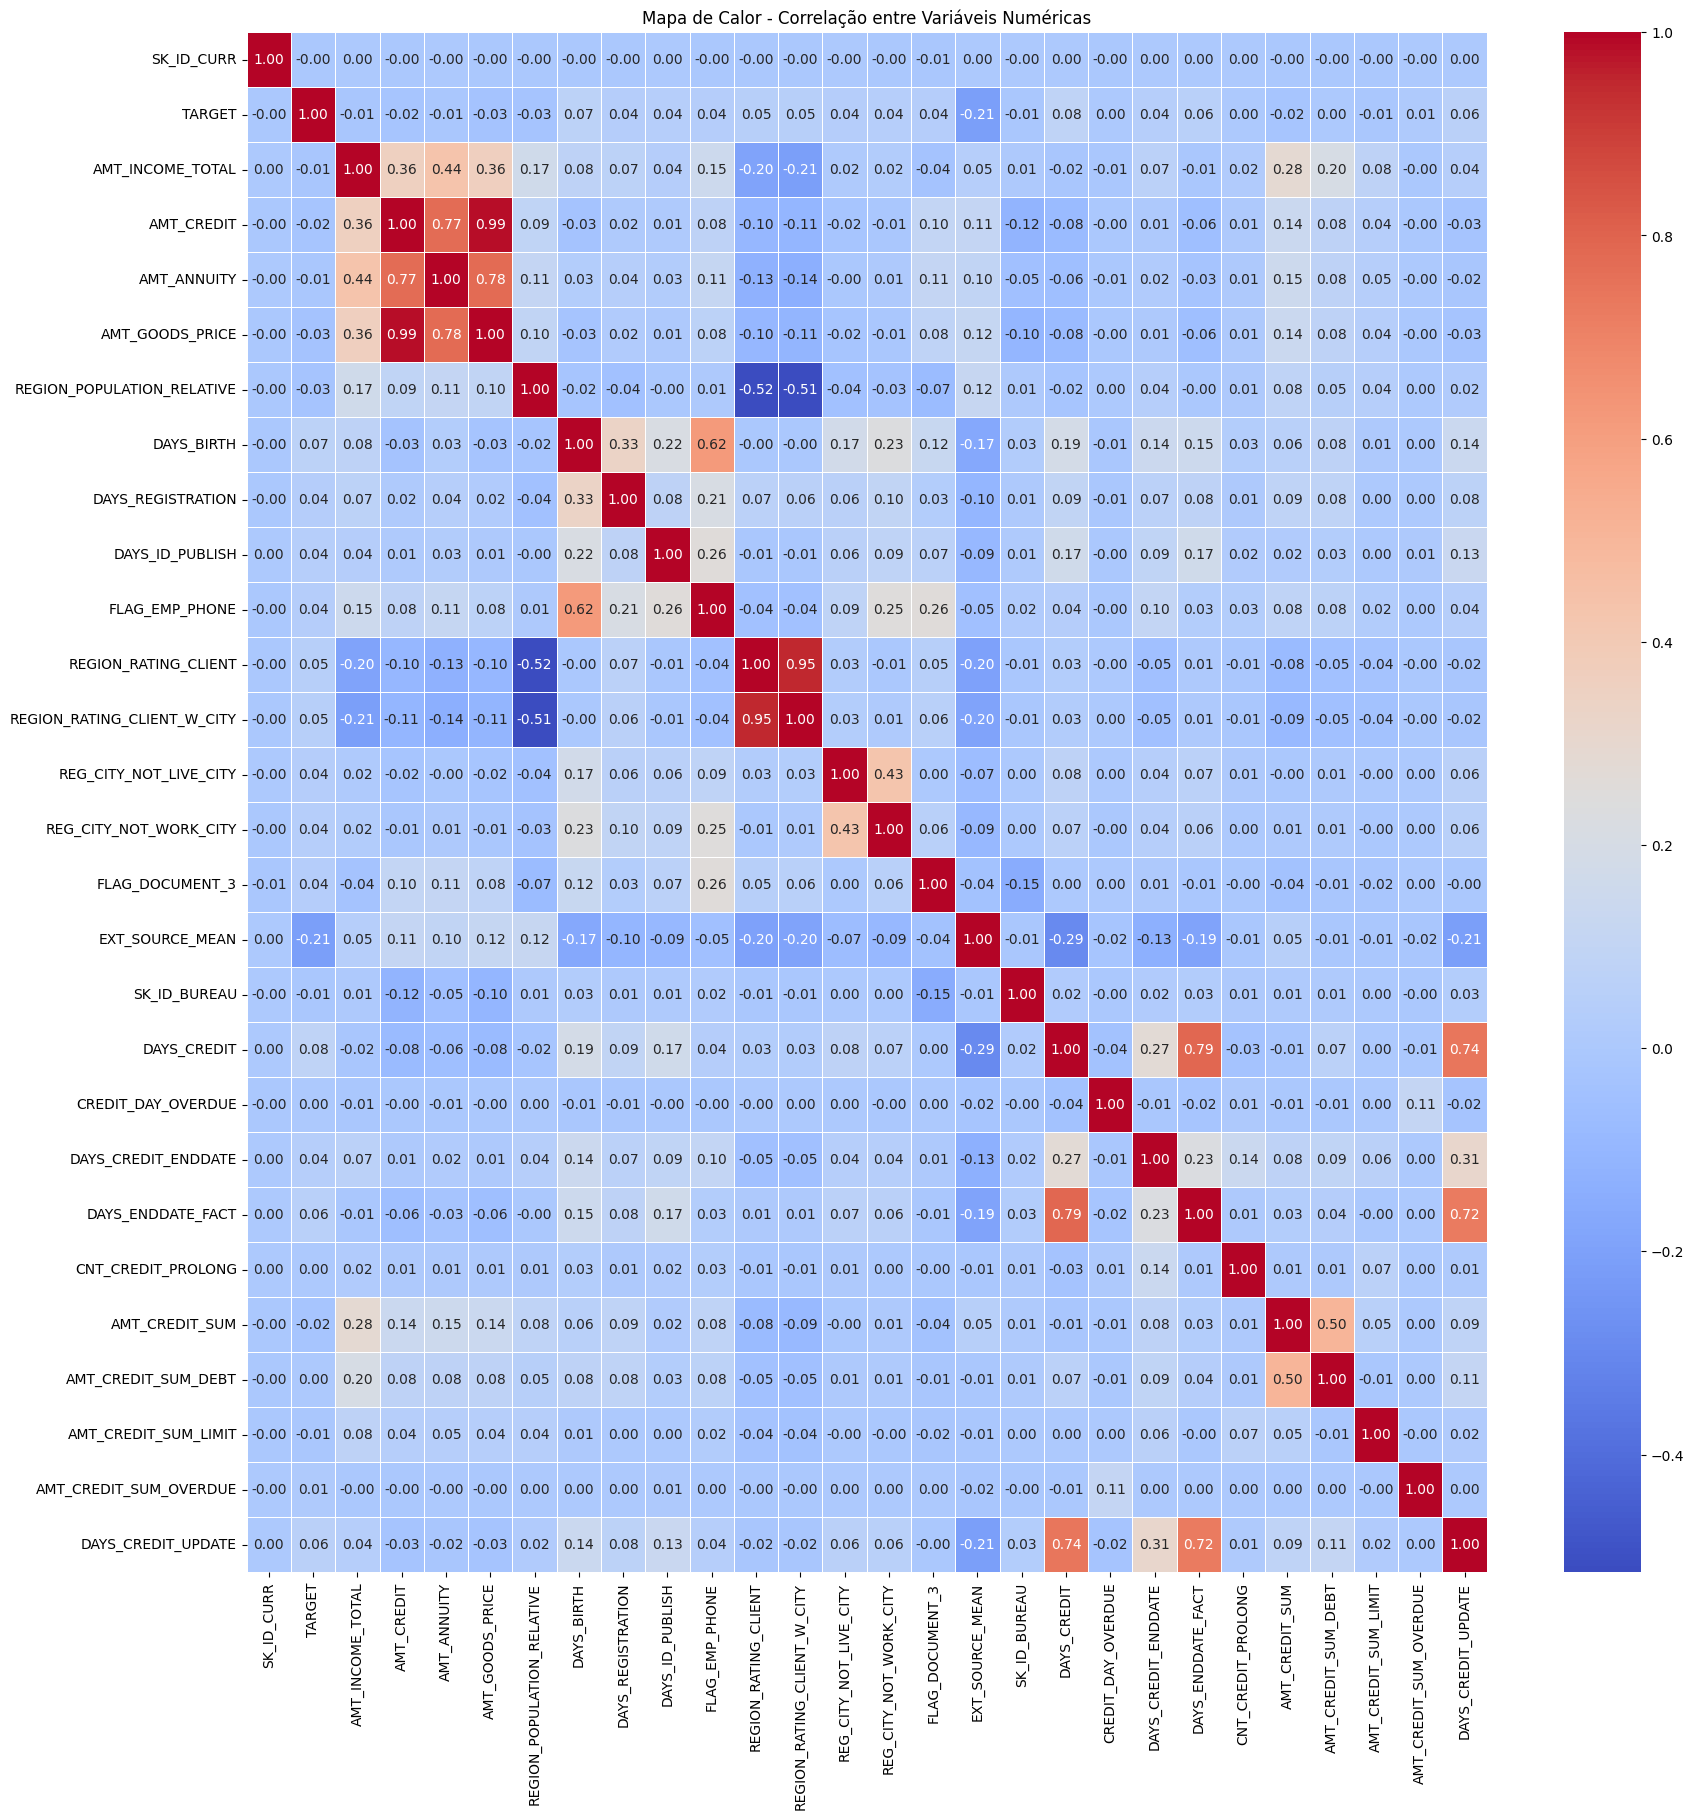

In [33]:
# Selecionando apenas as variáveis numéricas
numeric_vars = bureau_train.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
corr_matrix = numeric_vars.corr()

# Criando o mapa de calor
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlação entre Variáveis Numéricas')
plt.show()

Conclusão

- Após adicionar o dataframe bureau ao application_train ainda temos uma correlação fraca das variaveis com a Target.
- Vamos tentar eliminar os outliears dessas variaveis e fazer ajustes para ver se melhora.

## Outliers (bureau_train)

In [34]:
print(bureau_train.dtypes)

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_EMP_PHONE                   int64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE               object
FLAG_DOCUMENT_3                  int64
EXT_SOURCE_MEAN                float64
SK_ID_BUREAU                   float64
CREDIT_ACTIVE                   object
CREDIT_CURRENCY                 object
DAYS_CREDIT                    float64
CREDIT_DAY_OVERDUE       

### OUTLIERS 
('AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT_SUM')

In [35]:
bureau_train.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'FLAG_DOCUMENT_3', 'EXT_SOURCE_MEAN', 'SK_ID_BUREAU', 'CREDIT_ACTIVE',
       'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE'],
      dtype='object')

In [36]:
# AMT_INCOME_TOTAL: Montante total de renda
# AMT_CREDIT: Montante do crédito
# AMT_ANNUITY: Montante da anuidade (pagamento mensal)
# AMT_GOODS_PRICE: Preço dos bens
# AMT_CREDIT_SUM: Soma do montante de crédito
# AMT_CREDIT_SUM_DEBT: Soma do montante da dívida de crédito
# AMT_CREDIT_SUM_LIMIT: Soma do limite de crédito

#### ('AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE' )

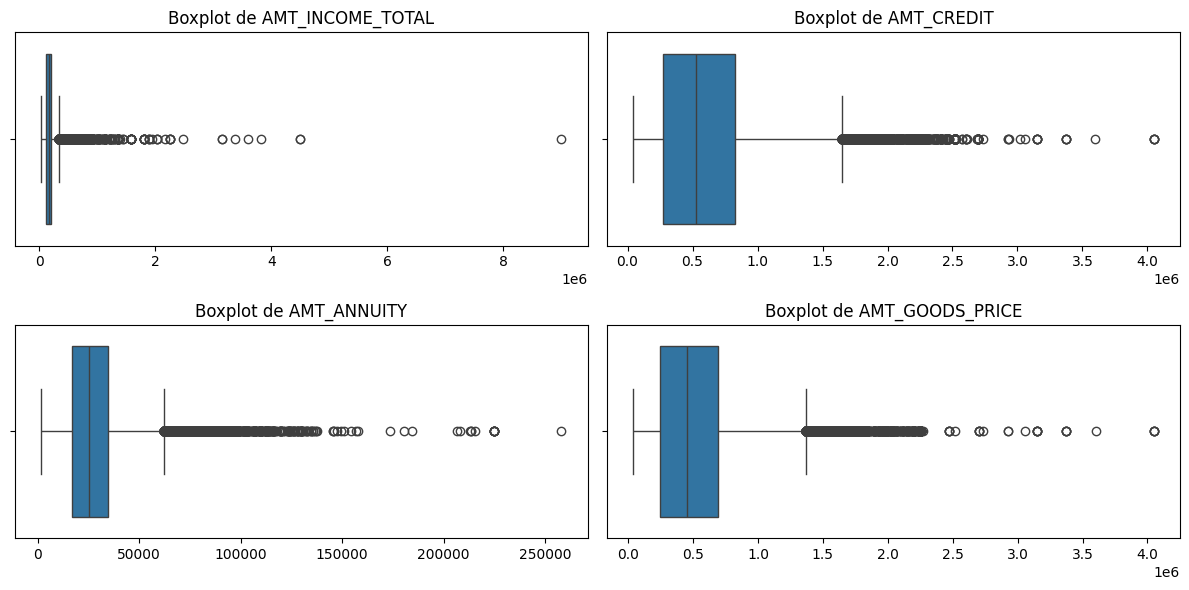

In [37]:
# Lista de variáveis para plotagem
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [38]:
# Função para truncar outliers
def truncate_outliers(df, column, lower_percentile=0.02, upper_percentile=0.98):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Aplicar a função a cada coluna
for column in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    bureau_train = truncate_outliers(bureau_train, column)


In [39]:
# Função para truncar outliers
def truncate_outliers(df, column, lower_percentile=0.02, upper_percentile=0.98):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Aplicar a função a cada coluna
for column in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    bureau_test = truncate_outliers(bureau_test, column)

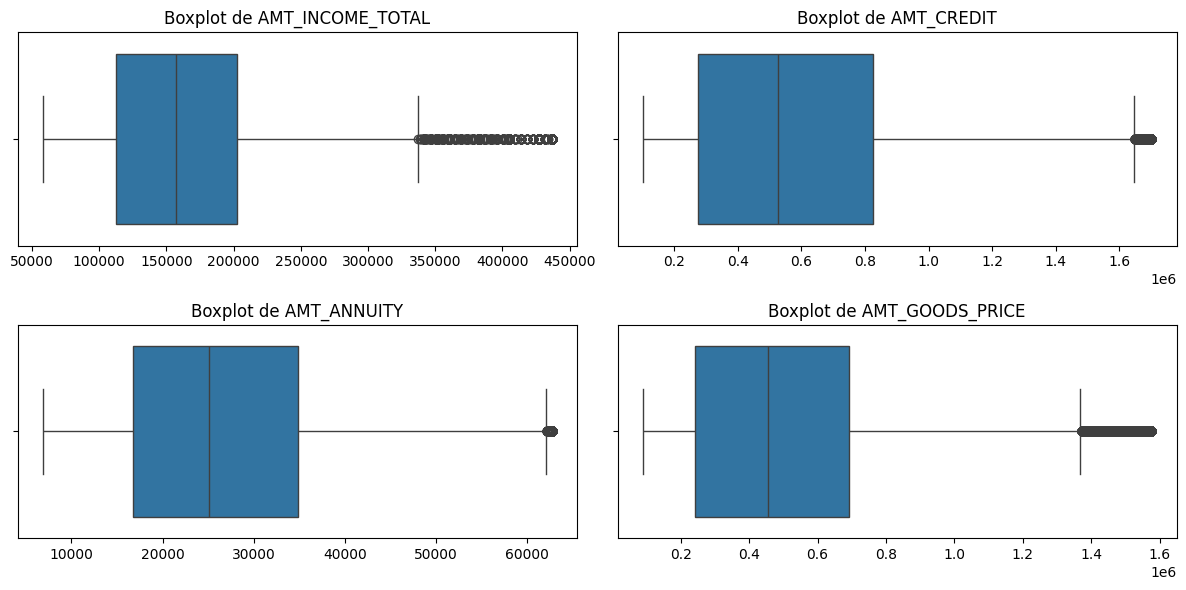

In [40]:
# Lista de variáveis para plotagem
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

#### ('AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE')

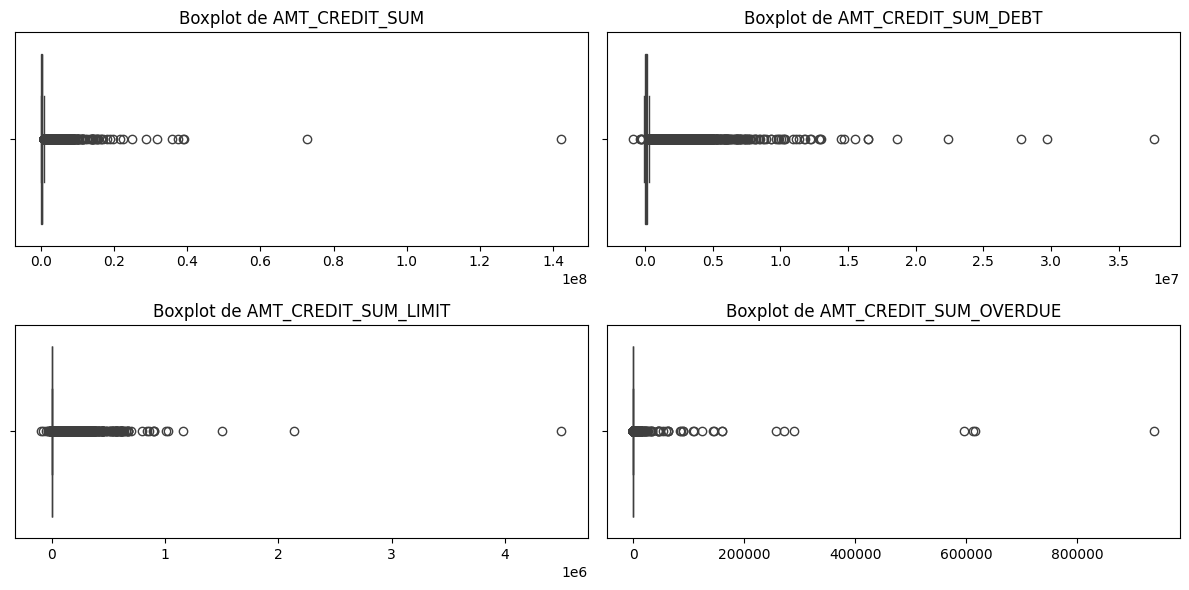

In [41]:
# Lista de variáveis para plotagem
vars_to_plot = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [42]:
bureau_train[bureau_train['AMT_CREDIT_SUM_LIMIT'] < 0].shape

(76, 35)

- Não faz sentido que a variável AMT_CREDIT_SUM_LIMIT tenha valores negativos
- AMT_CREDIT_SUM_LIMIT representa o limite de crédito concedido ao cliente em uma linha de crédito específica. Esse valor indica o máximo que o cliente pode utilizar, mas não é uma dívida atual.

In [43]:
bureau_train = bureau_train[bureau_train['AMT_CREDIT_SUM_LIMIT'] >= 0]
bureau_test = bureau_test[bureau_test['AMT_CREDIT_SUM_LIMIT'] >= 0]

bureau_train.shape, bureau_test.shape

((149876, 35), (64269, 35))

In [44]:
# Excluindo registros acima de  1 milhão
# 7 registros
bureau_train = bureau_train[bureau_train['AMT_CREDIT_SUM_LIMIT'] < 1_000_000]
bureau_test = bureau_test[bureau_test['AMT_CREDIT_SUM_LIMIT'] < 1_000_000]

bureau_train.shape, bureau_test.shape

((149870, 35), (64266, 35))

In [45]:
bureau_train[bureau_train['AMT_CREDIT_SUM_OVERDUE'] > 200_000]

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
143820,266765,0,M,162000.0,699808.5,29781.0,625500.0,Working,Higher education,0.022625,...,137.500000,-533.000000,-132.000000,0.0,710977.50,0.000,0.0,612237.4425,Consumer credit,-197.000000
970,101121,1,M,180000.0,436032.0,20326.5,360000.0,Working,Secondary / secondary special,0.002506,...,393.000000,15229.000000,-714.000000,0.0,339851.25,242617.500,0.0,271017.0000,Consumer credit,-366.500000
276221,420080,0,M,135000.0,521280.0,28278.0,450000.0,Commercial associate,Secondary / secondary special,0.046220,...,689.666667,-1597.333333,-1370.000000,0.0,369181.50,0.000,0.0,617070.0000,Consumer credit,-1152.333333
18736,121845,1,F,112500.0,450000.0,35554.5,450000.0,Working,Higher education,0.028663,...,357.000000,88.500000,-383.000000,0.0,674149.50,1437854.505,0.0,596808.0000,Consumer credit,-199.750000
50261,158187,0,F,81000.0,808650.0,26086.5,675000.0,Commercial associate,Secondary / secondary special,0.035792,...,11.500000,-690.000000,-1130.333333,0.0,482879.25,0.000,0.0,256408.8750,Consumer credit,-810.750000
283201,427996,0,M,157500.0,497520.0,32391.0,450000.0,Working,Incomplete higher,0.011657,...,60.800000,-496.200000,-1202.500000,0.0,743158.35,479065.950,0.0,290129.4000,Consumer credit,-725.300000
220200,355093,0,F,85500.0,883863.0,25461.0,737784.0,Working,Secondary / secondary special,0.018801,...,417.500000,-1487.000000,-1411.500000,0.0,1143785.25,0.000,0.0,939170.2500,Consumer credit,-1012.000000


Interpretação dos Dados:

- Os valores elevados de AMT_CREDIT_SUM_OVERDUE podem indicar que esses clientes têm histórico de inadimplência ou dificuldades financeiras passadas.
Contudo, outros fatores como o tipo de crédito, o montante total de crédito (AMT_CREDIT), e a situação atual de emprego e educação (NAME_INCOME_TYPE, NAME_EDUCATION_TYPE) também são relevantes para determinar a capacidade de pagamento e o risco.

- Portanto, é razoável encontrar esses registros variados entre diferentes clientes, pois cada um pode ter uma combinação única de fatores financeiros que influenciam seu perfil de crédito. A análise desses dados deve ser feita com cuidado para compreender o contexto completo e tomar decisões informadas em relação à concessão de crédito.

Conclusão:

- Vejo esses registros extremos como reais para os clientes, portanto, vou deixa-los mesmo causando outliers, mantê-los trará uma variância maior do perfil dos clientes, o que contribuirá para personalizar as decisões de crédito de acordo com as necessidades individuais dos clientes, possibilitando um aumento dos perfis de clientes para o banco.
- Quanto a valores extremos para o modelo, usaremos um modelo mais robusto para melhor performace.

### OUTLIERS
('DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE')

In [46]:
# DAYS_BIRTH: Representa a idade do cliente em dias na data da aplicação do crédito. Geralmente expresso como um número negativo em relação à data atual.
# DAYS_REGISTRATION: Indica há quantos dias o registro do cliente na instituição financeira estava ativo na data da aplicação do crédito.
# DAYS_ID_PUBLISH: Mostra há quantos dias atrás o documento de identidade do cliente foi publicado.
# DAYS_CREDIT: Indica há quantos dias o crédito foi solicitado na data da aplicação. É negativo porque é medido em relação à data atual.
# CREDIT_DAY_OVERDUE: Representa o número de dias em que o pagamento do crédito está atrasado. É uma métrica importante para avaliar a inadimplência.
# DAYS_CREDIT_ENDDATE: Indica quantos dias atrás o crédito estava previsto para terminar na data da aplicação do crédito.
# DAYS_ENDDATE_FACT: Mostra quantos dias atrás o crédito realmente terminou em relação à data da aplicação do crédito.
# DAYS_CREDIT_UPDATE: se refere ao número de dias desde a última atualização dos detalhes de um crédito registrado nos dados disponíveis.

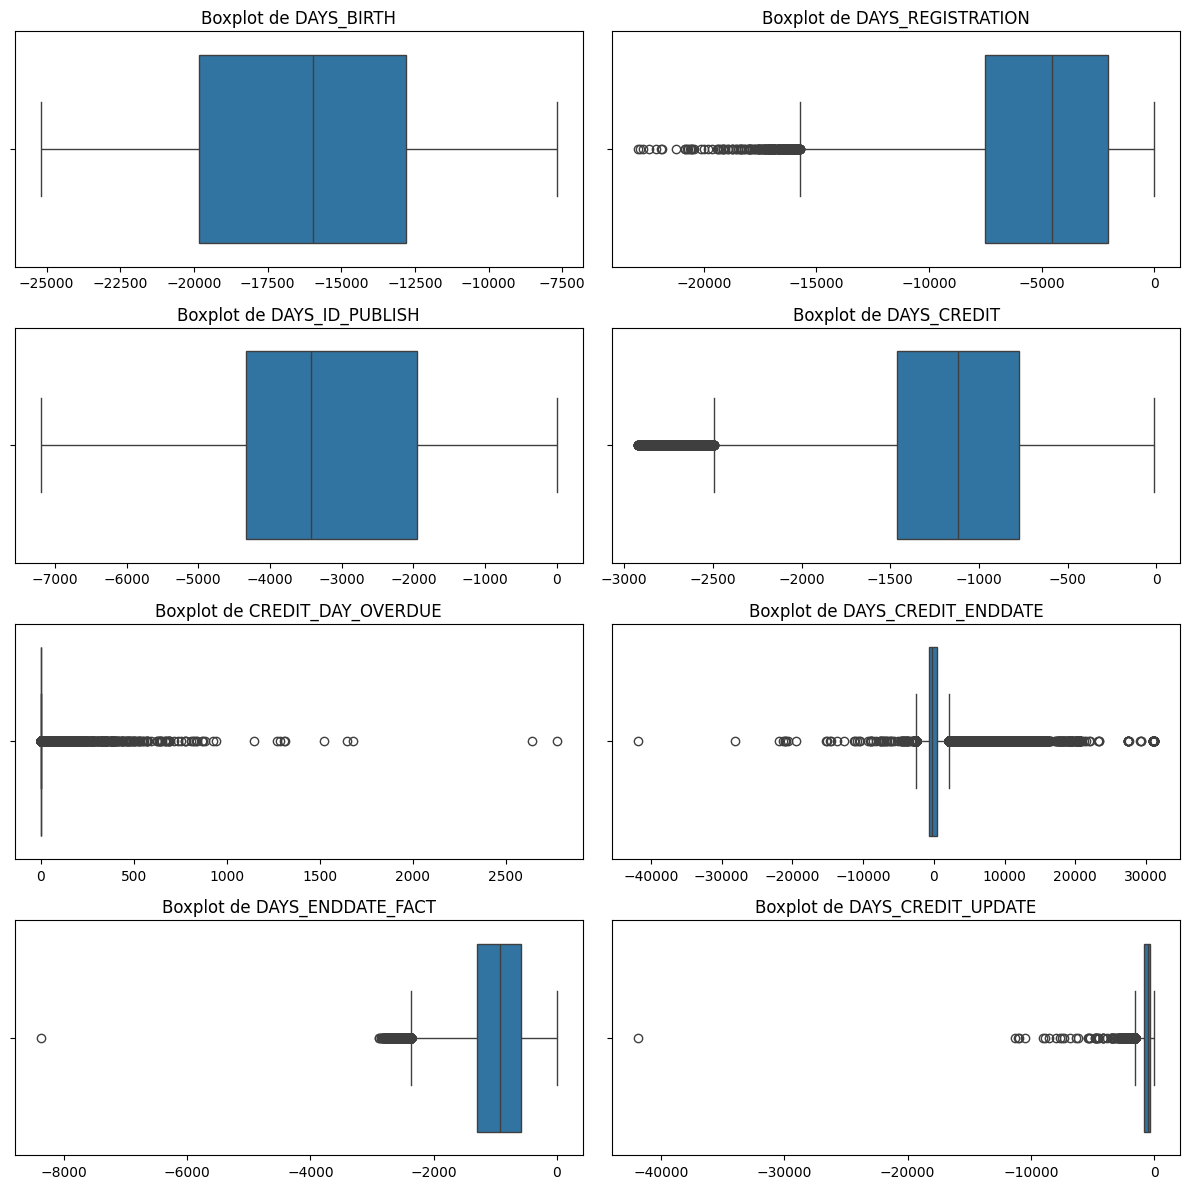

In [47]:
# Lista de variáveis para plotagem
vars_to_plot = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_CREDIT', 
                'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [48]:
# Vamos eliminar esse valore extremo de -10000
bureau_train = bureau_train[bureau_train['DAYS_ENDDATE_FACT'] > -10000]
bureau_train = bureau_train[bureau_train['DAYS_CREDIT_UPDATE'] > -10000]

bureau_test = bureau_test[bureau_test['DAYS_ENDDATE_FACT'] > -10000]
bureau_test = bureau_test[bureau_test['DAYS_CREDIT_UPDATE'] > -10000]

bureau_train.shape, bureau_test.shape

((149865, 35), (64263, 35))

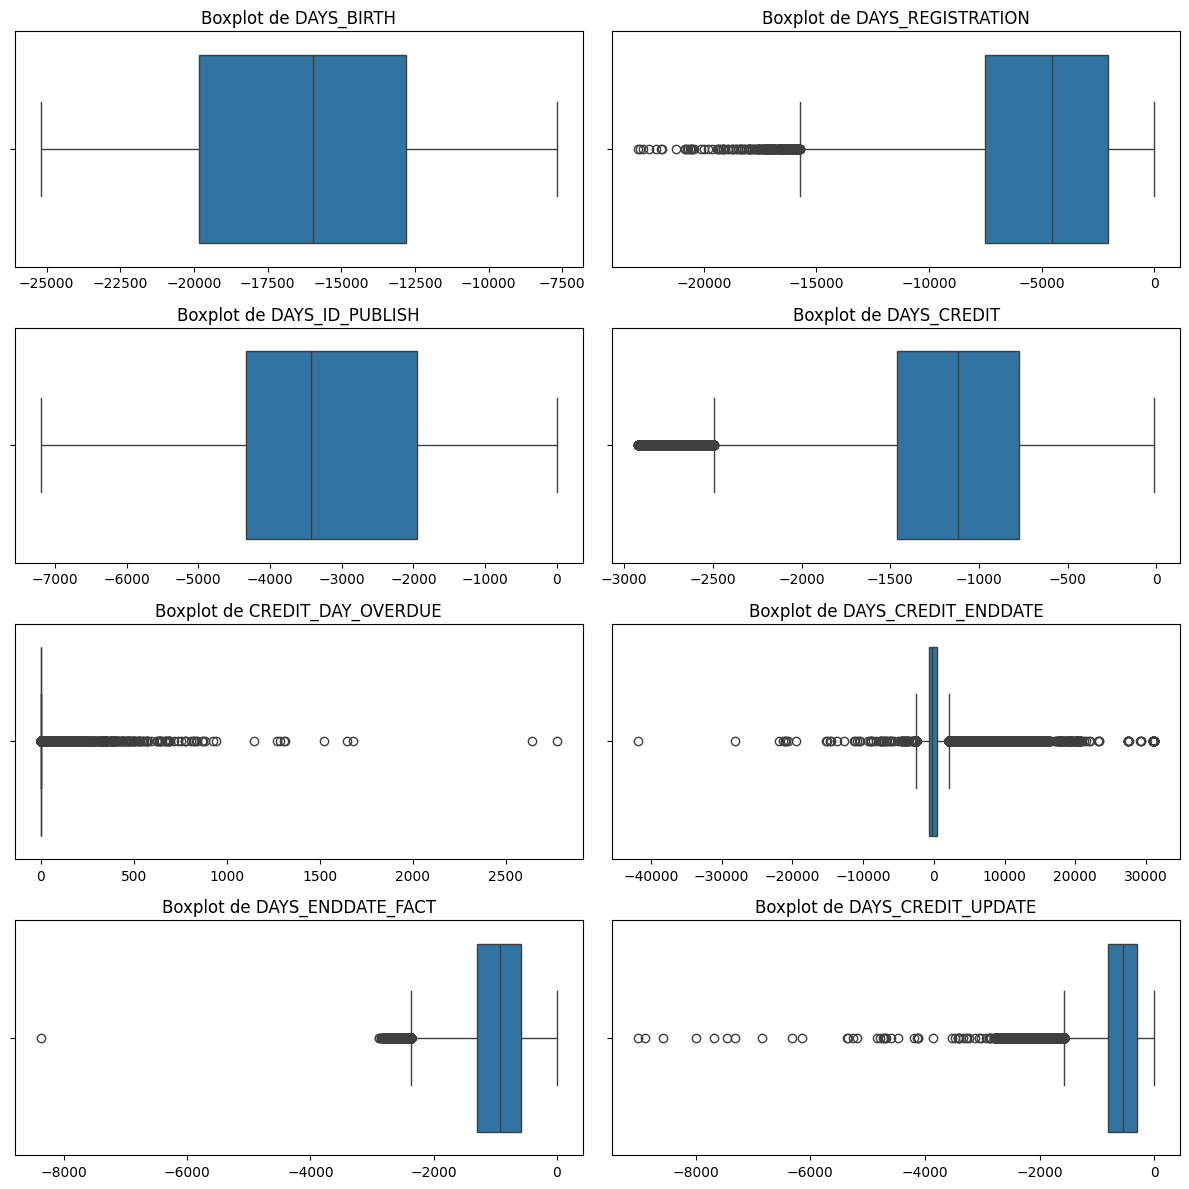

In [49]:
# Lista de variáveis para plotagem
vars_to_plot = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_CREDIT', 
                'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [50]:
# Verificando quantos regsitros existem abaixo de -10000
bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] < -10000].shape

(20, 35)

In [51]:
# Excluindo esses valores 
bureau_train = bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] > -10000]
bureau_test = bureau_test[bureau_test['DAYS_CREDIT_ENDDATE'] > -10000]

bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] < -10000].shape

(0, 35)

In [52]:
# Registros que causam outliears acima de 20 mil dias
# Não existe pessoas envolvidas há tanto tempo num emprestimo
bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] > 20000].shape

(104, 35)

In [53]:
# Vamos excluir esses registros também
bureau_train = bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] < 20000]
bureau_test = bureau_test[bureau_test['DAYS_CREDIT_ENDDATE'] < 20000]

bureau_train.shape, bureau_test.shape

((149741, 35), (64210, 35))

In [54]:
# Vou limitar a variável de registros até -16 mil dias (43 anos)
bureau_train.loc[bureau_train['DAYS_REGISTRATION'] < -16000, 'DAYS_REGISTRATION'] = -16000
bureau_test.loc[bureau_test['DAYS_REGISTRATION'] < -16000, 'DAYS_REGISTRATION'] = -16000

In [55]:
# Vou excluir esse registro também
bureau_train[bureau_train['DAYS_ENDDATE_FACT'] < -7000].shape

(1, 35)

In [56]:
bureau_train = bureau_train[bureau_train['DAYS_ENDDATE_FACT'] > -7000]
bureau_test = bureau_test[bureau_test['DAYS_ENDDATE_FACT'] > -7000]

In [57]:
bureau_train[bureau_train['DAYS_CREDIT_ENDDATE'] > 13000].shape

(910, 35)

In [58]:

# O banco não empresta para uma media de idade de clientes de 38 anos (-14038) fazendo empréstimos a longo prazo de 43 anos (15759)
# A média de tempo de empréstimo dos bancos é de 35 anos para pessoas jovens
# São dados discrepantes
enddate = bureau_train[['DAYS_BIRTH', 'DAYS_CREDIT_ENDDATE']]
enddate[enddate['DAYS_CREDIT_ENDDATE'] > 15000].describe()

,DAYS_BIRTH,DAYS_CREDIT_ENDDATE
count,511.000000,511.000000
mean,-14072.864971,15789.897614
std,4068.329380,1080.288552
min,-24114.000000,15001.000000
25%,-17303.500000,15293.500000
50%,-13283.000000,15425.500000
75%,-10671.000000,15611.250000
max,-7924.000000,19915.000000


In [59]:
bureau_train.loc[bureau_train['DAYS_CREDIT_ENDDATE'] > 13500, 'DAYS_CREDIT_ENDDATE'] = 13500
bureau_test.loc[bureau_test['DAYS_CREDIT_ENDDATE'] > 13500, 'DAYS_CREDIT_ENDDATE'] = 13500

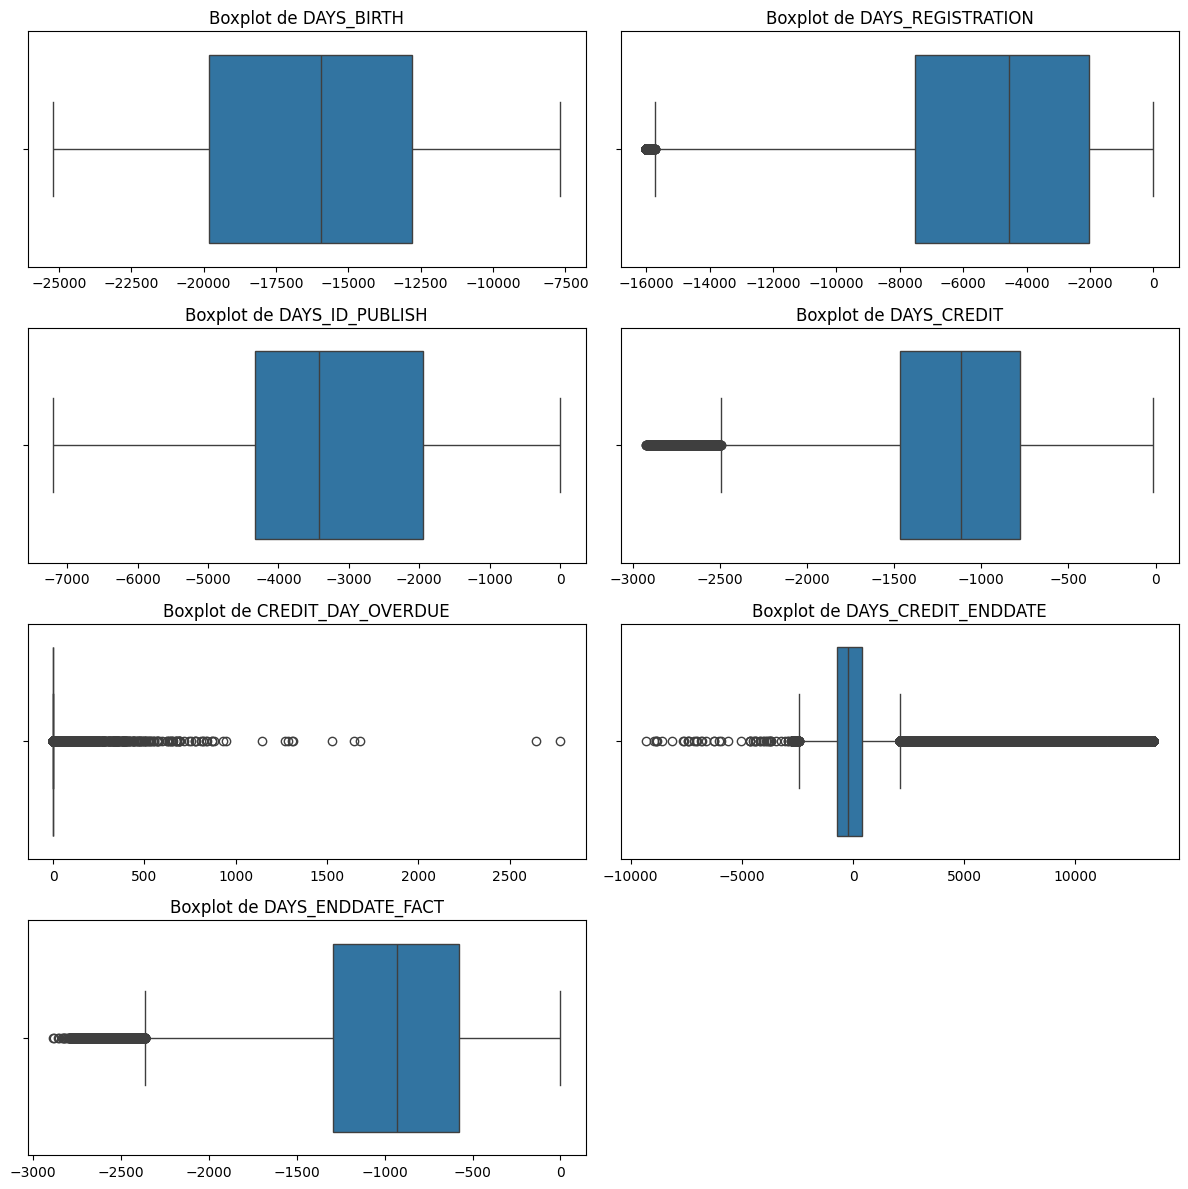

In [60]:
# Lista de variáveis para plotagem
vars_to_plot = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_CREDIT', 
                'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop para plotar os boxplots
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

### OUTLIERS
('REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',  'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY, 'CREDIT_TYPE', 'EXT_SOURCE_MEAN', 'CNT_CREDIT_PROLONG'' )

In [61]:
# REGION_POPULATION_RELATIVE: Indica a densidade populacional relativa da região onde o cliente reside.
# FLAG_EMP_PHONE: Booleano que indica se o cliente forneceu um número de telefone do empregador.
# REGION_RATING_CLIENT: Classificação da região onde o cliente mora.
# REGION_RATING_CLIENT_W_CITY: Classificação da região onde o cliente mora, incluindo a cidade.
# REG_CITY_NOT_LIVE_CITY: Indica se o cliente mora em uma cidade diferente da registrada.
# REG_CITY_NOT_WORK_CITY: Indica se o local de trabalho do cliente é diferente da cidade registrada.
# CREDIT_TYPE: Tipo de crédito que o cliente possui (por exemplo, crédito ao consumidor, crédito empresarial).
# EXT_SOURCE_MEAN: Média de fontes externas de dados que podem impactar a análise de crédito.
# CNT_CREDIT_PROLONG: Quantidade de vezes que o cliente prolongou a duração do crédito.

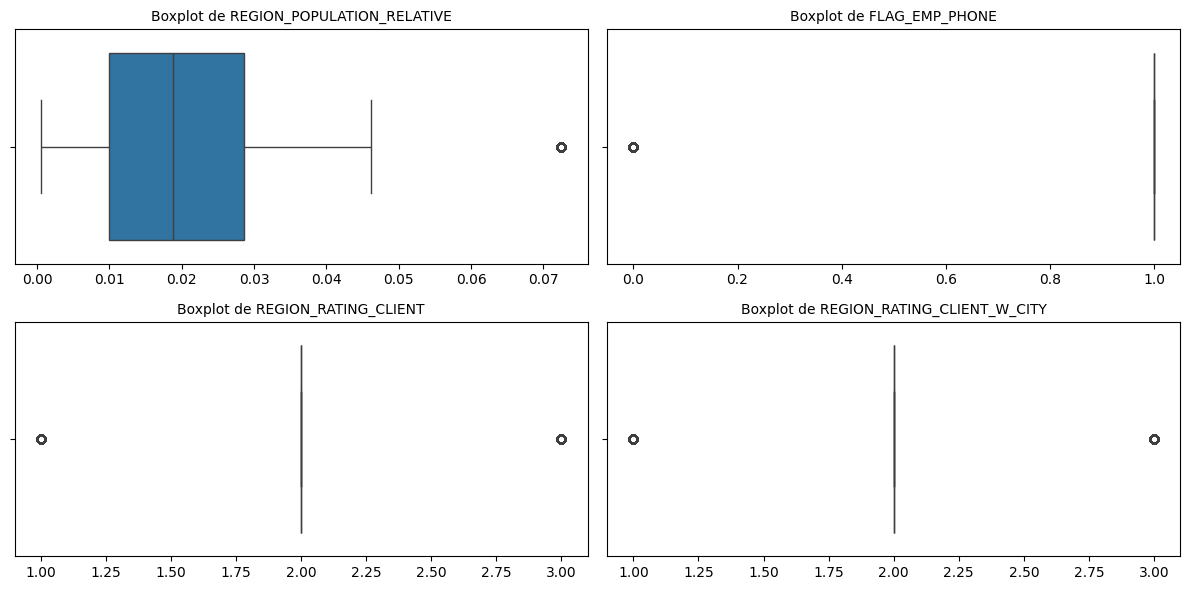

In [62]:
# Lista de variáveis para plotagem
vars_to_plot = ['REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT',
                'REGION_RATING_CLIENT_W_CITY']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Loop para plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}', fontsize=10)  
    plt.xlabel('')
    plt.ylabel('')

# Ajustando layout e espaçamento entre subplots
plt.tight_layout()

plt.show()

In [63]:
# Vamos manter por se referir a densidade populacional
bureau_train[bureau_train['REGION_POPULATION_RELATIVE'] > 0.06]

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
210471,343894,0,F,270000.0,504000.0,19660.5,504000.0,Commercial associate,Higher education,0.072508,...,0.0,4013.333333,-1873.600000,0.0,80393.250000,22003.500000,0.0000,0.0,Consumer credit,-772.166667
296826,443895,0,F,247500.0,755190.0,31995.0,675000.0,Working,Incomplete higher,0.072508,...,0.0,746.000000,-979.000000,0.0,651924.000000,601251.000000,0.0000,0.0,Credit card,-171.666667
128241,248753,0,M,436500.0,1699740.0,62698.5,1575000.0,Pensioner,Higher education,0.072508,...,0.0,308.500000,-1333.857143,0.0,993573.750000,282981.681818,132659.0625,0.0,Credit card,-570.416667
70374,181637,0,F,360000.0,450000.0,47254.5,450000.0,Commercial associate,Higher education,0.072508,...,0.0,-617.000000,-1431.666667,0.0,613921.500000,242369.677500,0.0000,0.0,Consumer credit,-465.571429
249793,389024,0,F,180000.0,306306.0,13491.0,247500.0,Commercial associate,Secondary / secondary special,0.072508,...,0.0,-638.363636,-1056.666667,0.0,698188.500000,75992.500000,0.0000,0.0,Consumer credit,-842.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143946,266909,1,F,202500.0,592560.0,31023.0,450000.0,Working,Secondary / secondary special,0.072508,...,0.0,-675.400000,-1006.700000,0.0,362672.966250,0.000000,17955.0000,0.0,Consumer credit,-827.666667
8155,109510,0,F,279000.0,757597.5,40486.5,702000.0,Commercial associate,Higher education,0.072508,...,0.0,473.250000,-1114.000000,0.0,288018.000000,57903.952500,716.4225,0.0,Credit card,-338.500000
287486,433010,0,M,135000.0,270000.0,13500.0,270000.0,Working,Incomplete higher,0.072508,...,0.0,-809.285714,-984.666667,0.0,90606.278571,14632.500000,0.0000,0.0,Consumer credit,-630.428571
68840,179840,0,F,225000.0,382500.0,19125.0,382500.0,Pensioner,Secondary / secondary special,0.072508,...,0.0,53.125000,-514.428571,0.0,169875.000000,53514.000000,0.0000,0.0,Consumer credit,-360.375000


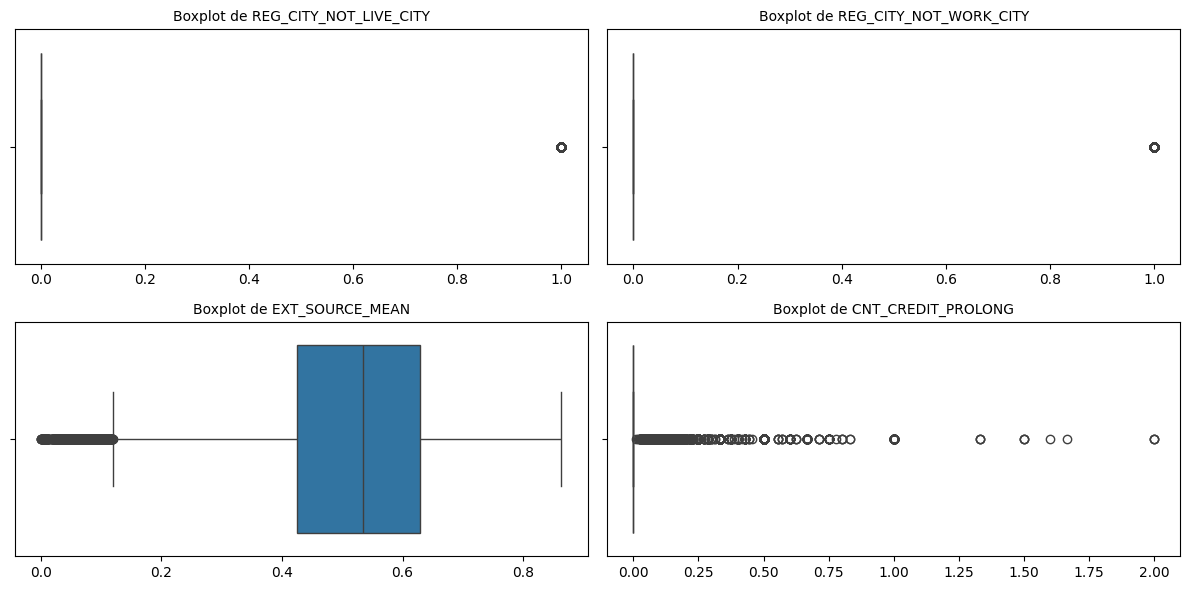

In [64]:
# Lista de variáveis para plotagem
vars_to_plot = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                'EXT_SOURCE_MEAN', 'CNT_CREDIT_PROLONG']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Loop para plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=bureau_train[var])
    plt.title(f'Boxplot de {var}', fontsize=10)  
    plt.xlabel('')
    plt.ylabel('')

# Ajustando layout e espaçamento entre subplots
plt.tight_layout()

plt.show()

# Análise de Variáveis

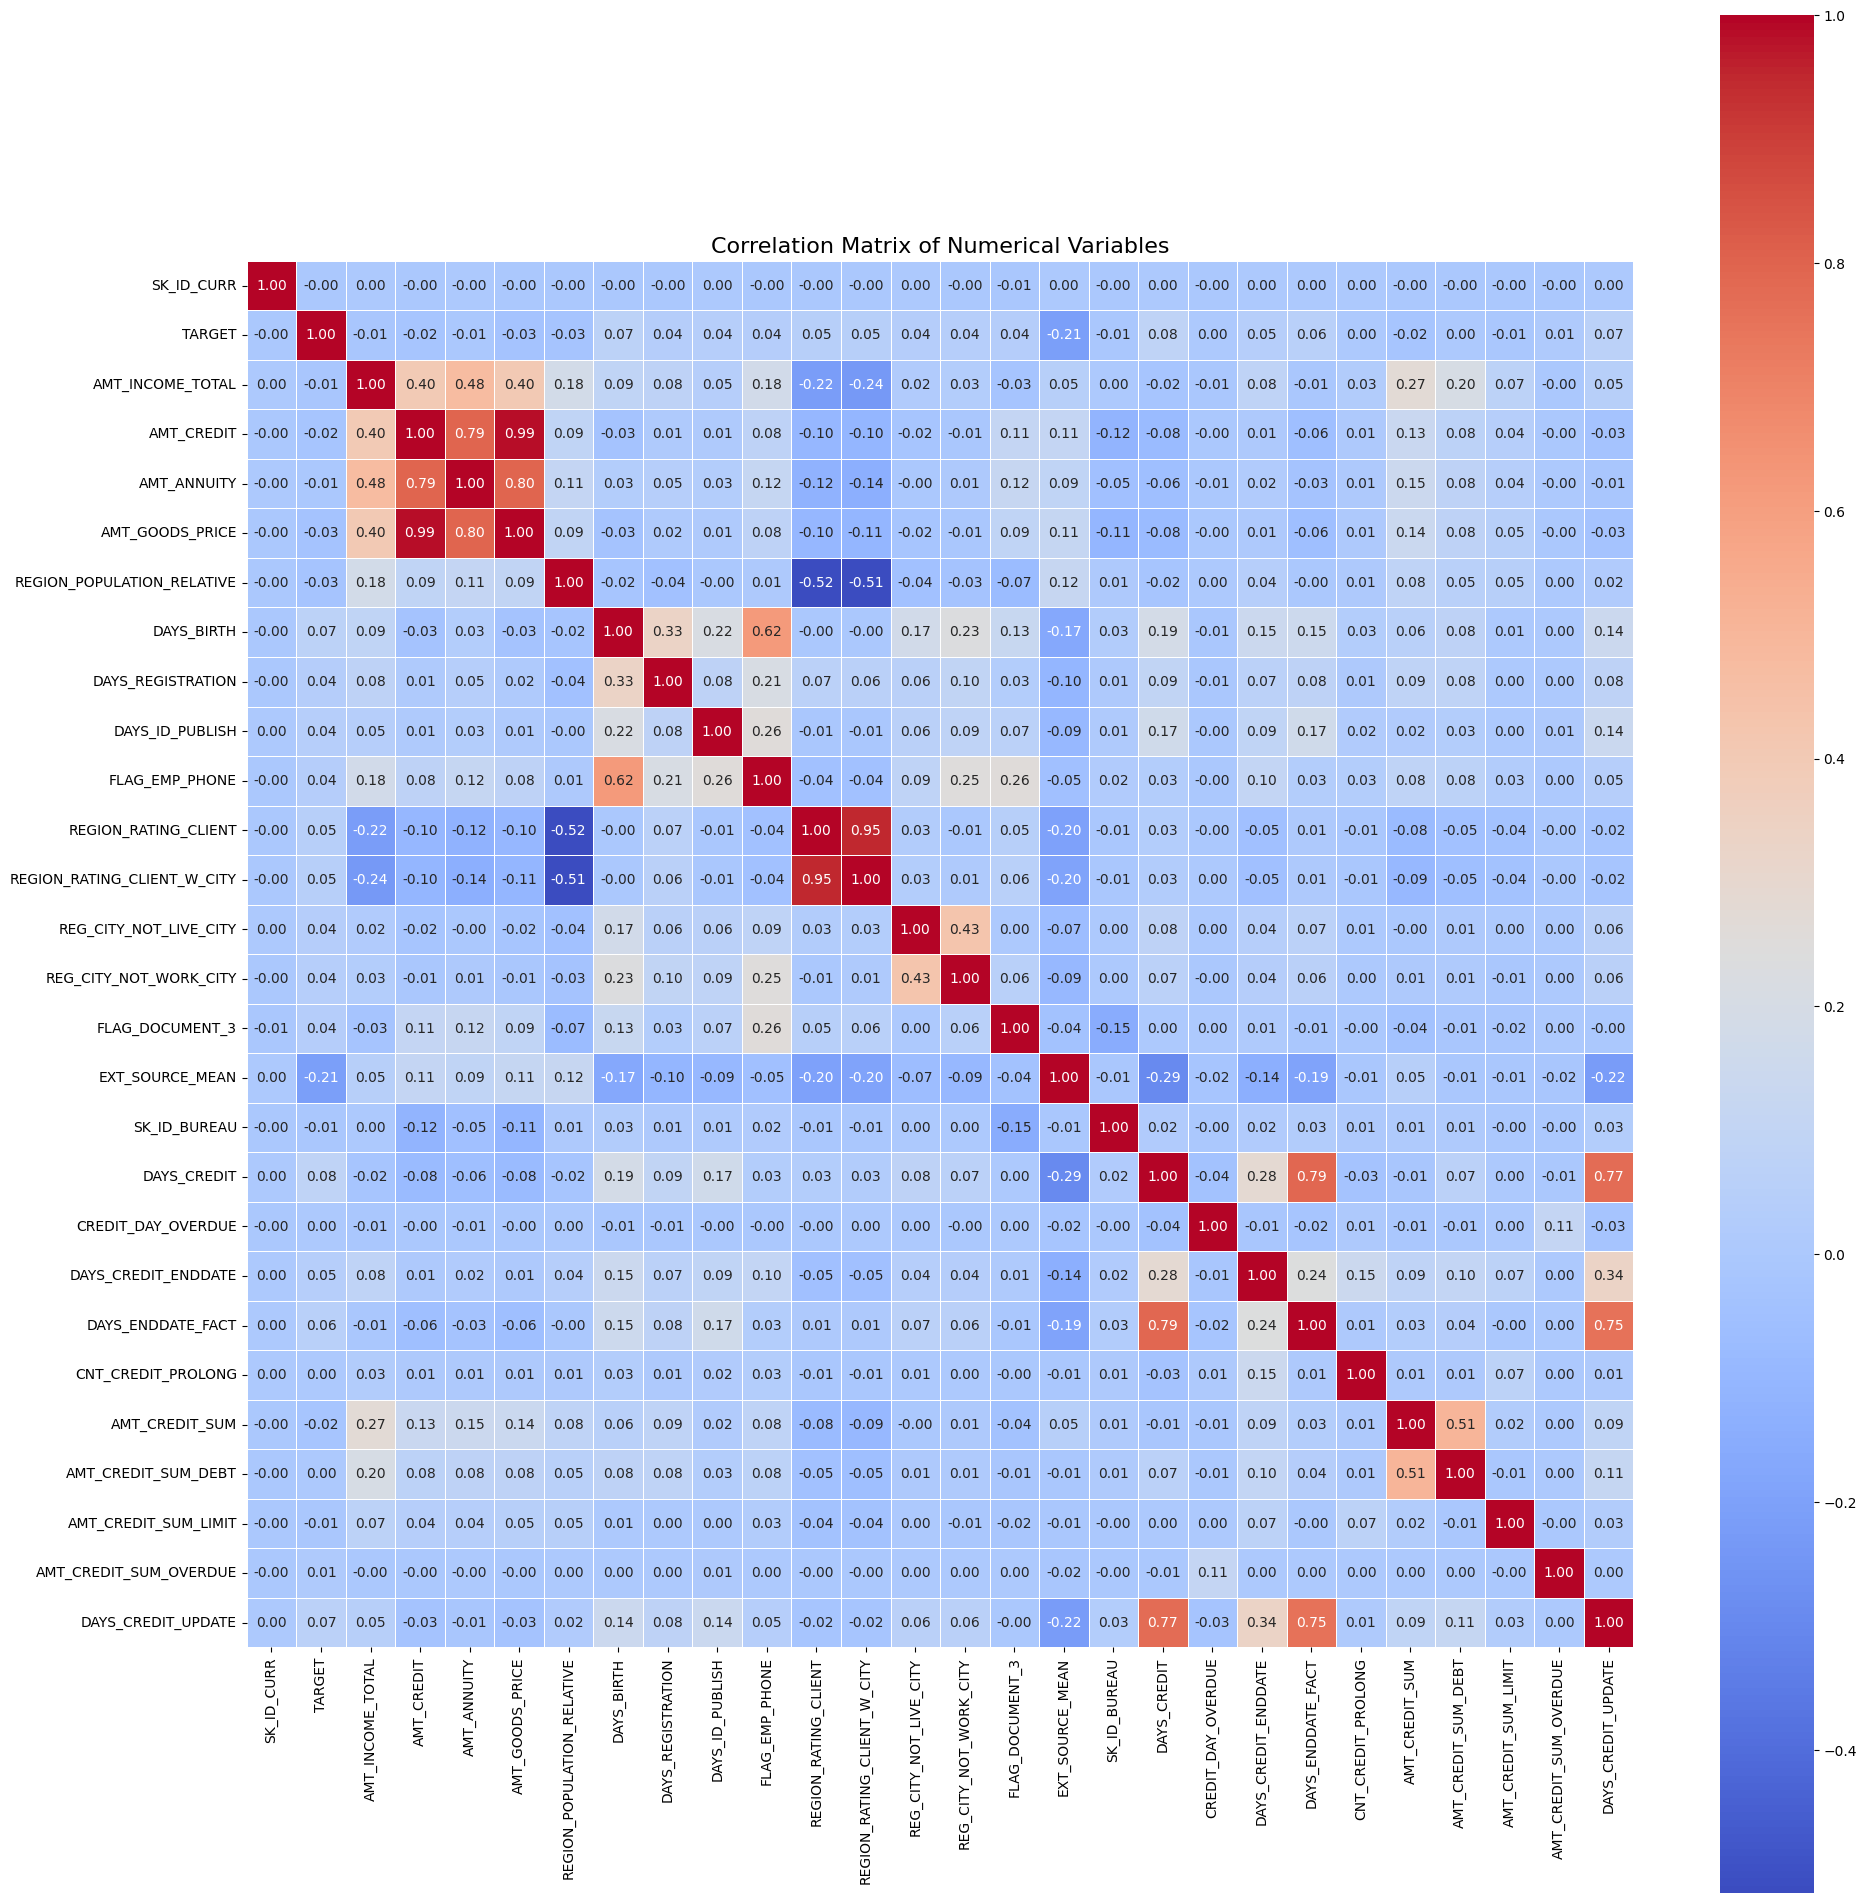

In [65]:
# Selecionar apenas as colunas numéricas
numeric_cols = bureau_train.select_dtypes(include=['int64', 'float64']).columns

# Calcular a matriz de correlação
correlation_matrix = bureau_train[numeric_cols].corr()

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.yticks()
plt.xticks()
plt.tight_layout()
plt.show()

In [66]:
# Selecionar apenas as variáveis numéricas
numeric_cols = bureau_train.select_dtypes(include=['number']).columns.tolist()

# Criar um novo dataframe apenas com as variáveis numéricas
bureau_train_numeric = bureau_train[numeric_cols]

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Feature"] = bureau_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(bureau_train_numeric.values, i) for i in range(len(bureau_train_numeric.columns))]

# Ordenar em ordem decrescente de VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print(vif_data)

                        Feature         VIF
0   REGION_RATING_CLIENT_W_CITY  198.995570
1          REGION_RATING_CLIENT  198.218825
2                    AMT_CREDIT  133.120794
3               AMT_GOODS_PRICE  130.296886
4                  SK_ID_BUREAU   61.250026
5                    DAYS_BIRTH   26.336953
6                   DAYS_CREDIT   21.770936
7               EXT_SOURCE_MEAN   16.440606
8                   AMT_ANNUITY   15.730148
9             DAYS_ENDDATE_FACT   13.870308
10           DAYS_CREDIT_UPDATE    9.773092
11               FLAG_EMP_PHONE    9.605732
12                   SK_ID_CURR    8.067875
13             AMT_INCOME_TOTAL    7.778467
14              DAYS_ID_PUBLISH    6.030144
15   REGION_POPULATION_RELATIVE    4.337778
16              FLAG_DOCUMENT_3    4.015306
17            DAYS_REGISTRATION    3.475165
18               AMT_CREDIT_SUM    1.794713
19       REG_CITY_NOT_WORK_CITY    1.672526
20          AMT_CREDIT_SUM_DEBT    1.538138
21       REG_CITY_NOT_LIVE_CITY 

In [67]:
inadimplentes = bureau_train[bureau_train['TARGET'] == 1]
nao_inadimplentes = bureau_train[bureau_train['TARGET'] == 0]


def calcular_iv(inadimplentes, nao_inadimplentes, variavel):
    # Calculando a taxa de inadimplência e não inadimplência
    bad_rate = inadimplentes.groupby(variavel).size() / len(inadimplentes)
    good_rate = nao_inadimplentes.groupby(variavel).size() / len(nao_inadimplentes)
    
    # Calculando o WOE (Weight of Evidence)
    woe = np.log(good_rate / bad_rate)
    
    # Calculando o IV (Information Value)
    iv = np.sum((good_rate - bad_rate) * woe)
    
    return iv

# Dicionário para armazenar os IVs
iv_variaveis = {}

# Iteração sobre as colunas dos dataframes (supondo que são os mesmos para inadimplentes e não inadimplentes)
for coluna in inadimplentes.columns:
    if coluna != 'TARGET':
        iv = calcular_iv(inadimplentes, nao_inadimplentes, coluna)
        iv_variaveis[coluna] = iv

# Ordenando as variáveis por IV decrescente
iv_variaveis_ordenado = sorted(iv_variaveis.items(), key=lambda x: x[1], reverse=True)

print(f'Variaveis menos importantes com base no IV:')

# Filtrando e exibindo apenas variáveis com IV < 0.02
for variavel, valor_iv in iv_variaveis_ordenado:
    if valor_iv < 0.02:
        print(f'{variavel}: {valor_iv}')


Variaveis menos importantes com base no IV:
REG_CITY_NOT_LIVE_CITY: 0.019095540659274535
CREDIT_TYPE: 0.015810922297797392
AMT_CREDIT_SUM_OVERDUE: 0.015329749235866321
CNT_CREDIT_PROLONG: 0.004733539582745087
CREDIT_CURRENCY: 6.279025406174026e-09
SK_ID_CURR: 0.0
SK_ID_BUREAU: 0.0


- REG_CITY_NOT_LIVE_CITY: Apresenta um IV relativamente baixo e pode não contribuir significativamente para a análise preditiva.
- CREDIT_TYPE: Similarmente, possui um IV baixo, indicando menos poder preditivo.
- AMT_CREDIT_SUM_OVERDUE: Apesar de ter um VIF baixo, seu IV é baixo, o que sugere que não tem grande impacto na variabilidade da variável resposta (TARGET).
- CNT_CREDIT_PROLONG: Também possui um IV baixo e pode não ser relevante para a análise de crédito.
- CREDIT_CURRENCY: O IV é extremamente baixo, indicando que esta variável praticamente não contém informação relevante para a análise.

In [68]:
# Lista de variáveis a serem excluídas devido à multicolinearidade
variaveis_para_excluir = ['REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE', 'AMT_CREDIT_SUM_OVERDUE', 'CNT_CREDIT_PROLONG', 'CREDIT_CURRENCY']

# Excluir as variáveis do DataFrame
bureau_train = bureau_train.drop(columns=variaveis_para_excluir)
bureau_test = bureau_test.drop(columns=variaveis_para_excluir)

bureau_train.shape, bureau_test.shape

((149740, 30), (64210, 30))

In [69]:
# Vamos salvar o dataframes bureau_train e bureau_test
bureau_train.to_csv('bureau_train.csv', index=False)
bureau_test.to_csv('bureau_test.csv', index=False)